In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [55]:
data=pd.read_csv('C:/Users/vedra/OneDrive/Desktop/Data science VEDRAN/Wine Quality/WineQT.csv')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [57]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [58]:
data['quality']=data['quality']-3 #ocjenu kvalieta svodimo na 0-5

In [59]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,3,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3,1595


In [60]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,2.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,2.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,3.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,3.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000,1597.000000


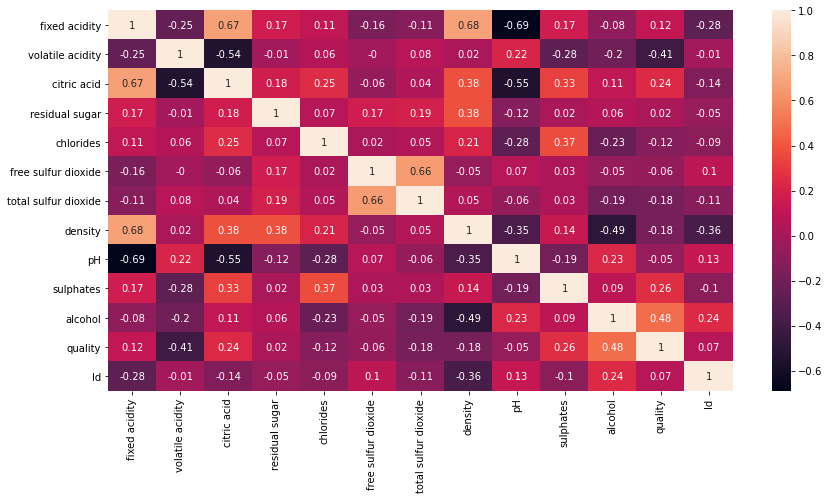

In [61]:
correlation=data.corr().round(2)
plt.figure(figsize=(14,7))
sns.heatmap(correlation,annot=True)


In [62]:
data.describe().T[['min','max']][:-1]

,min,max
fixed acidity,4.60000,15.90000
volatile acidity,0.12000,1.58000
citric acid,0.00000,1.00000
residual sugar,0.90000,15.50000
chlorides,0.01200,0.61100
free sulfur dioxide,1.00000,68.00000
total sulfur dioxide,6.00000,289.00000
density,0.99007,1.00369
pH,2.74000,4.01000
sulphates,0.33000,2.00000


In [63]:
#normalizacija

for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    data[col]=data[col]/data[col].max()

In [64]:
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.465409,0.443038,0.00,0.122581,0.124386,0.161765,0.117647,0.994132,0.875312,0.280,0.630872,2,0
1,0.490566,0.556962,0.00,0.167742,0.160393,0.367647,0.231834,0.993135,0.798005,0.340,0.657718,2,1
2,0.490566,0.481013,0.04,0.148387,0.150573,0.220588,0.186851,0.993335,0.812968,0.325,0.657718,2,2
3,0.704403,0.177215,0.56,0.122581,0.122750,0.250000,0.207612,0.994331,0.788030,0.290,0.657718,3,3
4,0.465409,0.443038,0.00,0.122581,0.124386,0.161765,0.117647,0.994132,0.875312,0.280,0.630872,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.396226,0.322785,0.13,0.148387,0.124386,0.426471,0.138408,0.992079,0.852868,0.375,0.738255,3,1592
1139,0.427673,0.392405,0.08,0.122581,0.111293,0.411765,0.131488,0.992846,0.852868,0.410,0.637584,3,1593
1140,0.389937,0.379747,0.08,0.129032,0.147300,0.470588,0.152249,0.991242,0.860349,0.290,0.704698,2,1594
1141,0.371069,0.348101,0.10,0.141935,0.101473,0.573529,0.176471,0.991462,0.877805,0.380,0.751678,3,1595


In [65]:
features=data.drop(columns=['quality'])
target=data['quality']

In [66]:
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,0.465409,0.443038,0.00,0.122581,0.124386,0.161765,0.117647,0.994132,0.875312,0.280,0.630872,0
1,0.490566,0.556962,0.00,0.167742,0.160393,0.367647,0.231834,0.993135,0.798005,0.340,0.657718,1
2,0.490566,0.481013,0.04,0.148387,0.150573,0.220588,0.186851,0.993335,0.812968,0.325,0.657718,2
3,0.704403,0.177215,0.56,0.122581,0.122750,0.250000,0.207612,0.994331,0.788030,0.290,0.657718,3
4,0.465409,0.443038,0.00,0.122581,0.124386,0.161765,0.117647,0.994132,0.875312,0.280,0.630872,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.396226,0.322785,0.13,0.148387,0.124386,0.426471,0.138408,0.992079,0.852868,0.375,0.738255,1592
1139,0.427673,0.392405,0.08,0.122581,0.111293,0.411765,0.131488,0.992846,0.852868,0.410,0.637584,1593
1140,0.389937,0.379747,0.08,0.129032,0.147300,0.470588,0.152249,0.991242,0.860349,0.290,0.704698,1594
1141,0.371069,0.348101,0.10,0.141935,0.101473,0.573529,0.176471,0.991462,0.877805,0.380,0.751678,1595


In [67]:
x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.2, random_state=0)

In [68]:
#logistic regression
logreg=LogisticRegression(max_iter=10000)

In [69]:
logreg.fit(x_train,y_train.ravel())

LogisticRegression(max_iter=10000)

In [70]:
y_pred=logreg.predict(x_test)

In [71]:
print(classification_report(y_pred,y_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.00      1.00      0.00         0
           2       0.83      0.72      0.77       116
           3       0.73      0.59      0.65       113
           4       0.00      1.00      0.00         0
           5       0.00      1.00      0.00         0

    accuracy                           0.66       229
   macro avg       0.26      0.88      0.24       229
weighted avg       0.78      0.66      0.71       229



In [72]:
confusion_matrix(y_pred,y_test)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 1,  4, 83, 25,  3,  0],
       [ 0,  3, 17, 67, 24,  2],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

In [73]:
#SVC    

In [74]:
svc=SVC()

In [75]:
svc.fit(x_train,y_train)

SVC()

In [76]:
y_predSVC=svc.predict(x_test)

In [77]:
print(accuracy_score(y_test,y_predSVC))

0.49344978165938863


In [78]:
print(classification_report(y_test,y_predSVC, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      0.00      0.00         7
           2       0.54      0.48      0.51       100
           3       0.46      0.71      0.56        92
           4       1.00      0.00      0.00        27
           5       1.00      0.00      0.00         2

    accuracy                           0.49       229
   macro avg       0.83      0.20      0.18       229
weighted avg       0.58      0.49      0.45       229



In [79]:
#tuning


In [80]:
parameters = {'C': [6,8,10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
clf=GridSearchCV(svc,parameters)

In [81]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'C': [6, 8, 10],
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [82]:
#clf.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred=clf.predict(x_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test,zero_division=1))

In [ ]:
#DecisionTree
Tree_model=DecisionTreeClassifier()

In [ ]:
param={'max_depth':[5,10,15,20]}
clf=GridSearchCV(Tree_model,param)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

print(classification_report(y_pred,y_test,zero_division=1))


In [ ]:
#Random forest

In [83]:
forest=RandomForestClassifier()

In [84]:
forest.fit(x_train, y_train)
y_pred=forest.predict(x_test)

print(classification_report(y_pred,y_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.00      1.00      0.00         0
           2       0.78      0.72      0.75       108
           3       0.66      0.64      0.65        96
           4       0.52      0.56      0.54        25
           5       0.00      1.00      0.00         0

    accuracy                           0.67       229
   macro avg       0.33      0.82      0.32       229
weighted avg       0.70      0.67      0.68       229



In [85]:
forest.feature_importances_

array([0.06931504, 0.09565333, 0.06637865, 0.06479641, 0.07314997,
       0.05768738, 0.09619154, 0.0793144 , 0.06938322, 0.11618095,
       0.13078985, 0.08115925])

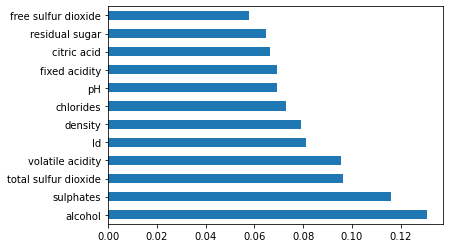

In [86]:
importances=pd.Series(forest.feature_importances_,index=features.columns)
importances.nlargest(15).plot(kind='barh')
plt.show()

In [87]:
c_values = list(np.arange(1, 200))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
tuned=GridSearchCV(forest,param_grid2,scoring='accuracy')

In [88]:
#tuned.fit(x_test,y_test)

In [89]:
#KNN classifier

In [100]:
K_model=KNeighborsClassifier()
K_model.fit(x_train,y_train)
y_pred=K_model.predict(x_test)
print(classification_report(y_pred,y_test,zero_division=1))

parameter={'n_neighbors': [10,20,30,40,50]}
clf=GridSearchCV(K_model,parameter)
clf.fit(x_train,y_train)
print('Tunirani parametri')
y_predtun=clf.predict(x_test)
print(classification_report(y_predtun,y_test,zero_division=1))


              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.00      0.00      0.00         3
           2       0.63      0.54      0.58       116
           3       0.55      0.52      0.54        98
           4       0.15      0.33      0.21        12
           5       0.00      1.00      0.00         0

    accuracy                           0.52       229
   macro avg       0.22      0.57      0.22       229
weighted avg       0.56      0.52      0.54       229

Tunirani parametri
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.00      1.00      0.00         0
           2       0.64      0.53      0.58       121
           3       0.51      0.46      0.48       103
           4       0.00      0.00      0.00         5
           5       0.00      1.00      0.00         0

    accuracy                           0.48       229
   m

In [108]:
x_model=XGBClassifier()

In [109]:
x_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [110]:
y_predx=x_model.predict(x_test)

In [113]:
print(classification_report(y_test,y_predx, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      0.00      0.00         7
           2       0.71      0.78      0.74       100
           3       0.62      0.65      0.64        92
           4       0.68      0.56      0.61        27
           5       1.00      0.50      0.67         2

    accuracy                           0.67       229
   macro avg       0.84      0.41      0.44       229
weighted avg       0.68      0.67      0.66       229

